In [82]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

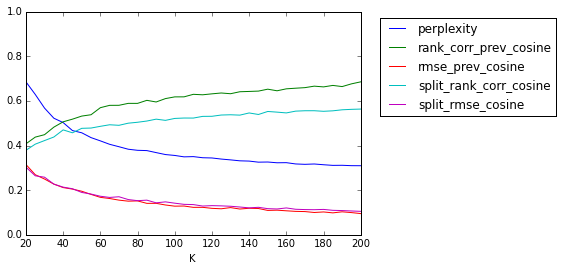

In [133]:
lda_stats = pd.read_table('../GenreModeling/eval_results/basic_lda_final.txt',sep=r"\s*",index_col='K')
lda_stats['perplexity'] = lda_stats['perplexity']/lda_stats['perplexity'].max()
cols = [col for col in lda_stats.columns if ('euclidean' not in col) and ('jsd' not in col)]
fig,ax = plt.subplots(1,1)
lda_stats[cols].plot(legend=None,ax=ax,xlim=(20,200))
ax.legend(bbox_to_anchor=(1.6,1.))


In [135]:
lda_summary = pd.read_table('../GenreModeling/eval_results/knn_lda.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
mf_summary = pd.read_table('../GenreModeling/eval_results/knn_mf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])

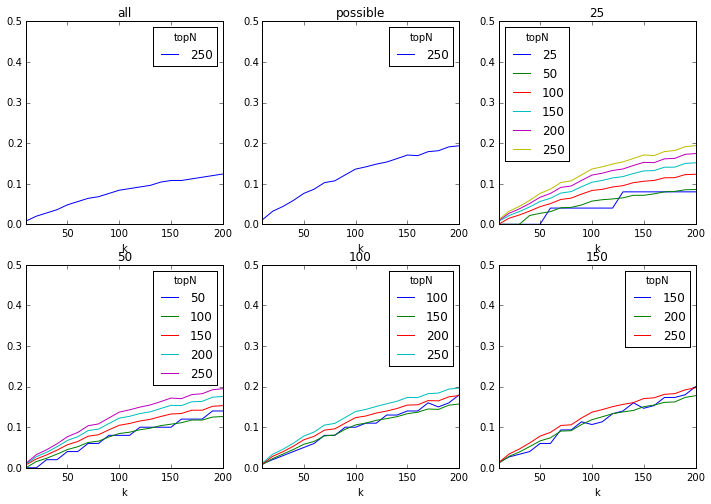

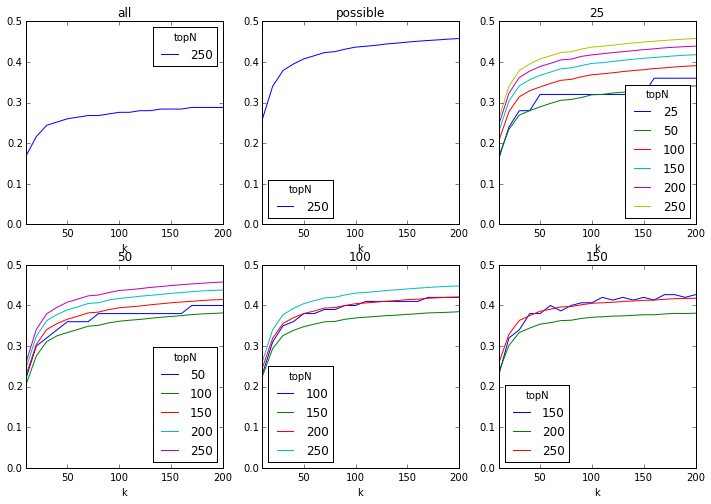

In [112]:
for d in [lda_summary,mf_summary]:
    fig,axes = plt.subplots(2,3,figsize=(12,8))
    flat = axes.flat
    for l in ['all','possible','25','50','100','150']:
        data=d.xs(['fm',l],level=['source','method'])['median'].unstack()
        if len(data)>0:
            data.plot(title=l,ax=flat.next(),ylim=[0,0.5])

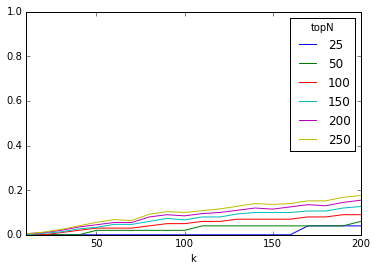

In [119]:
lda_summary.xs('split',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1))

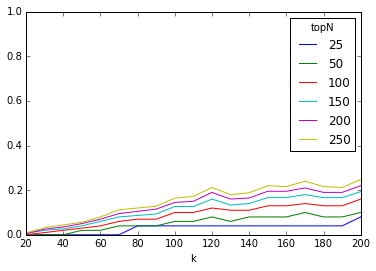

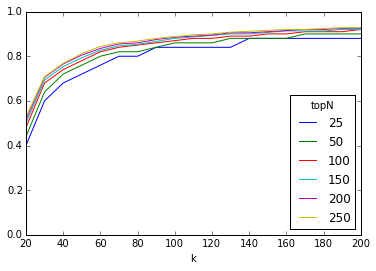

In [136]:
for d in (lda_summary,mf_summary):
    d.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1))